In [ ]:
import pickle
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [ ]:


# Define file paths
conversation_ids_path = 'data/analysis/conversation_ids.pkl'
backchannelers_path = 'data/analysis/backchannelers.pkl'
backchannel_rate_final_path = 'data/analysis/backchannel_rate_final.pkl'

# Load data from pickle files
with open(conversation_ids_path, 'rb') as file:
    conversation_ids = pickle.load(file)

with open(backchannelers_path, 'rb') as file:
    backchannelers = pickle.load(file)

with open(backchannel_rate_final_path, 'rb') as file:
    backchannel_rate_final = pickle.load(file)

# Assuming each loaded variable is a list and corresponds to a column in a DataFrame
data = {
    # 'conversation_id': conversation_ids,
    'user_id': backchannelers,
    'backchannel_rate': backchannel_rate_final
}

# Create a DataFrame
backchannel_df = pd.DataFrame(data)
backchannel_df['backchannel_rate'] = backchannel_df['backchannel_rate'].apply(lambda x: x[0] if x else None)

# print(backchannel_df.head(5))

metadata_df = pd.read_csv("data/analysis/combined_outcome.csv")


In [ ]:
col_to_select = 'age'

metadata_age_df = metadata_df[[col_to_select, 'user_id']]

backchannel_age_df = pd.merge(backchannel_df, metadata_age_df, on='user_id', how='inner')

grouped_df = backchannel_age_df.groupby('user_id').mean()

# Clean data: Remove NaN values
grouped_df = grouped_df.dropna(subset=[col_to_select, 'backchannel_rate'])

# Additionally, ensure there are no infinite values
grouped_df = grouped_df.replace([np.inf, -np.inf], np.nan).dropna(subset=[col_to_select, 'backchannel_rate'])

# Now perform the correlation calculation
age = grouped_df[col_to_select]
backchannel_rate = grouped_df['backchannel_rate']

# Calculate Pearson correlation coefficient and p-value
pearson_coefficient, pearson_p_value = stats.pearsonr(age, backchannel_rate)

# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, spearman_p_value = stats.spearmanr(age, backchannel_rate)

# Print Pearson results
print("Pearson correlation coefficient:", pearson_coefficient)
print("Pearson p-value:", pearson_p_value)

# Print Spearman results
print("Spearman correlation coefficient:", spearman_coefficient)
print("Spearman p-value:", spearman_p_value)

Pearson correlation coefficient: -0.06115085093410999
Pearson p-value: 0.06077783122993073
Spearman correlation coefficient: -0.04449835913013545
Spearman p-value: 0.17260514968369364


Overall iterative process

In [ ]:
# Define the list of features to test
features_to_test = [    'questions', 'nods', 'verbal_feedback', 'speak_quickly',
                    'politics', 'age', 'responsive', 'you_are_warm', 'smiles',
                        'my_turn_length', 'your_turn_length', 'turn_overlap_gap',
                        'i_am_good_listener', 'you_are_good_listener', 'responsive']

# Assuming 'metadata_df' and 'backchannel_df' are already loaded

results = []  # List to store results

for feature in features_to_test:
    # Prepare the DataFrame for the current feature
    metadata_feature_df = metadata_df[[feature, 'user_id']]
    backchannel_feature_df = pd.merge(backchannel_df, metadata_feature_df, on='user_id', how='inner')
    grouped_df = backchannel_feature_df.groupby('user_id').mean()

    # Clean data: Remove NaN and infinite values
    grouped_df = grouped_df.dropna(subset=[feature, 'backchannel_rate'])
    grouped_df = grouped_df.replace([np.inf, -np.inf], np.nan).dropna(subset=[feature, 'backchannel_rate'])

    # Calculate Pearson correlation coefficient and p-value if enough data is available
    if len(grouped_df) > 1:  # Need at least 2 data points to calculate correlation
        correlation_coefficient, p_value = stats.pearsonr(grouped_df[feature], grouped_df['backchannel_rate'])  # try running w spearman for age
        results.append({'feature': feature, 'correlation_coefficient': correlation_coefficient, 'p_value': p_value})
    else:
        results.append({'feature': feature, 'correlation_coefficient': 'N/A', 'p_value': 'N/A'})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

# # Save results to a CSV file
# results_df.to_csv('correlation_results.csv', index=False)


                  feature  correlation_coefficient   p_value
0               questions                -0.027899  0.392379
1                    nods                -0.017920  0.582796
2         verbal_feedback                -0.025731  0.430219
3           speak_quickly                 0.057593  0.077265
4                politics                 0.003216  0.921529
5                     age                -0.044498  0.172605
6              responsive                -0.046547  0.153655
7            you_are_warm                -0.060664  0.062726
8                  smiles                -0.026708  0.412908
9          my_turn_length                -0.029225  0.370274
10       your_turn_length                -0.023237  0.476249
11       turn_overlap_gap                 0.038284  0.240442
12     i_am_good_listener                 0.005725  0.860691
13  you_are_good_listener                -0.058218  0.074102
14             responsive                -0.046547  0.153655


For categorical data

In [ ]:
col_to_select = 'sex'
metadata_gender_df = metadata_df[[col_to_select, 'user_id']]
backchannel_gender_df = pd.merge(backchannel_df, metadata_gender_df, on='user_id', how='inner')
# Remove rows where 'sex' is NaN
backchannel_gender_df = backchannel_gender_df.dropna(subset=['sex'])

# Remove duplicate rows based on all columns
backchannel_gender_df = backchannel_gender_df.drop_duplicates(subset=['user_id', 'backchannel_rate', 'sex'])

# Group by 'sex' and calculate the average 'backchannel_rate' for each group
average_backchannel_rate_by_sex = backchannel_gender_df.groupby('sex')['backchannel_rate'].mean()

# Display the results
print(average_backchannel_rate_by_sex)

# todo - compute pearson correlation similar to above


sex
female                           0.048017
male                             0.050540
other_or_prefer_not_to_answer    0.050343
Name: backchannel_rate, dtype: float64


for more features

In [ ]:


# Define the list of categorical features you want to analyze
features_to_analyze = ['sex', 'race', 'edu']

# Assuming backchannel_df and metadata_df are already loaded

# Loop through each feature and calculate the average backchannel rate
for feature in features_to_analyze:
    # Select the feature and 'user_id' from metadata_df
    metadata_feature_df = metadata_df[[feature, 'user_id']]

    # Merge with backchannel_df
    backchannel_feature_df = pd.merge(backchannel_df, metadata_feature_df, on='user_id', how='inner')

    # Remove rows where the feature is NaN
    backchannel_feature_df = backchannel_feature_df.dropna(subset=[feature])

    # Remove duplicate rows
    backchannel_feature_df = backchannel_feature_df.drop_duplicates(subset=['user_id', 'backchannel_rate', feature])

    # Group by the feature and calculate the average backchannel_rate for each category
    average_backchannel_rate_by_feature = backchannel_feature_df.groupby(feature)['backchannel_rate'].mean()

    # Print the results for the current feature
    print(f"Average backchannel rate by {feature}:")
    print(average_backchannel_rate_by_feature)
    print()  # Print a newline for better separation of results


Average backchannel rate by sex:
sex
female                           0.048017
male                             0.050540
other_or_prefer_not_to_answer    0.050343
Name: backchannel_rate, dtype: float64

Average backchannel rate by race:
race
american_indian_or_alaska_native       0.044888
asian                                  0.053509
black_or_african_american              0.049975
hispanic_or_latino                     0.048826
mixed                                  0.050621
native_hawaiian_or_pacific_islander    0.052295
other                                  0.047120
prefer_not_to_say                      0.060851
white                                  0.047973
Name: backchannel_rate, dtype: float64

Average backchannel rate by edu:
edu
associate_degree         0.045394
bachelors_degree         0.049282
completed_high_school    0.044932
doctoral_degree          0.053434
masters_degree           0.050012
professional_degree      0.048812
some_college             0.050242
some_high_s

In [ ]:
# Features you want to analyze
features_to_analyze = ['sex']

# Prepare a DataFrame for correlation calculation
correlation_df = backchannel_df[['user_id', 'backchannel_rate']].drop_duplicates()

# Process each feature
for feature in features_to_analyze:
    # Merge feature data
    feature_df = metadata_df[['user_id', feature]]
    correlation_df = pd.merge(correlation_df, feature_df, on='user_id', how='inner')

# Encode categorical variables if necessary
correlation_df['sex'] = correlation_df['sex'].map({'male': 1, 'female': 0})  # Example for binary encoding

# One-hot encode other categorical features
# correlation_df = pd.get_dummies(correlation_df, columns=['race', 'edu'])

# Remove the 'user_id' column as it is non-numeric and not useful for correlation calculation
correlation_df.drop(columns='user_id', inplace=True)

In [ ]:
correlation_results = correlation_df.corr(method='pearson')['backchannel_rate'].drop('backchannel_rate')  # Drop self-correlation

# Print results
print(correlation_results)

sex    0.028864
Name: backchannel_rate, dtype: float64


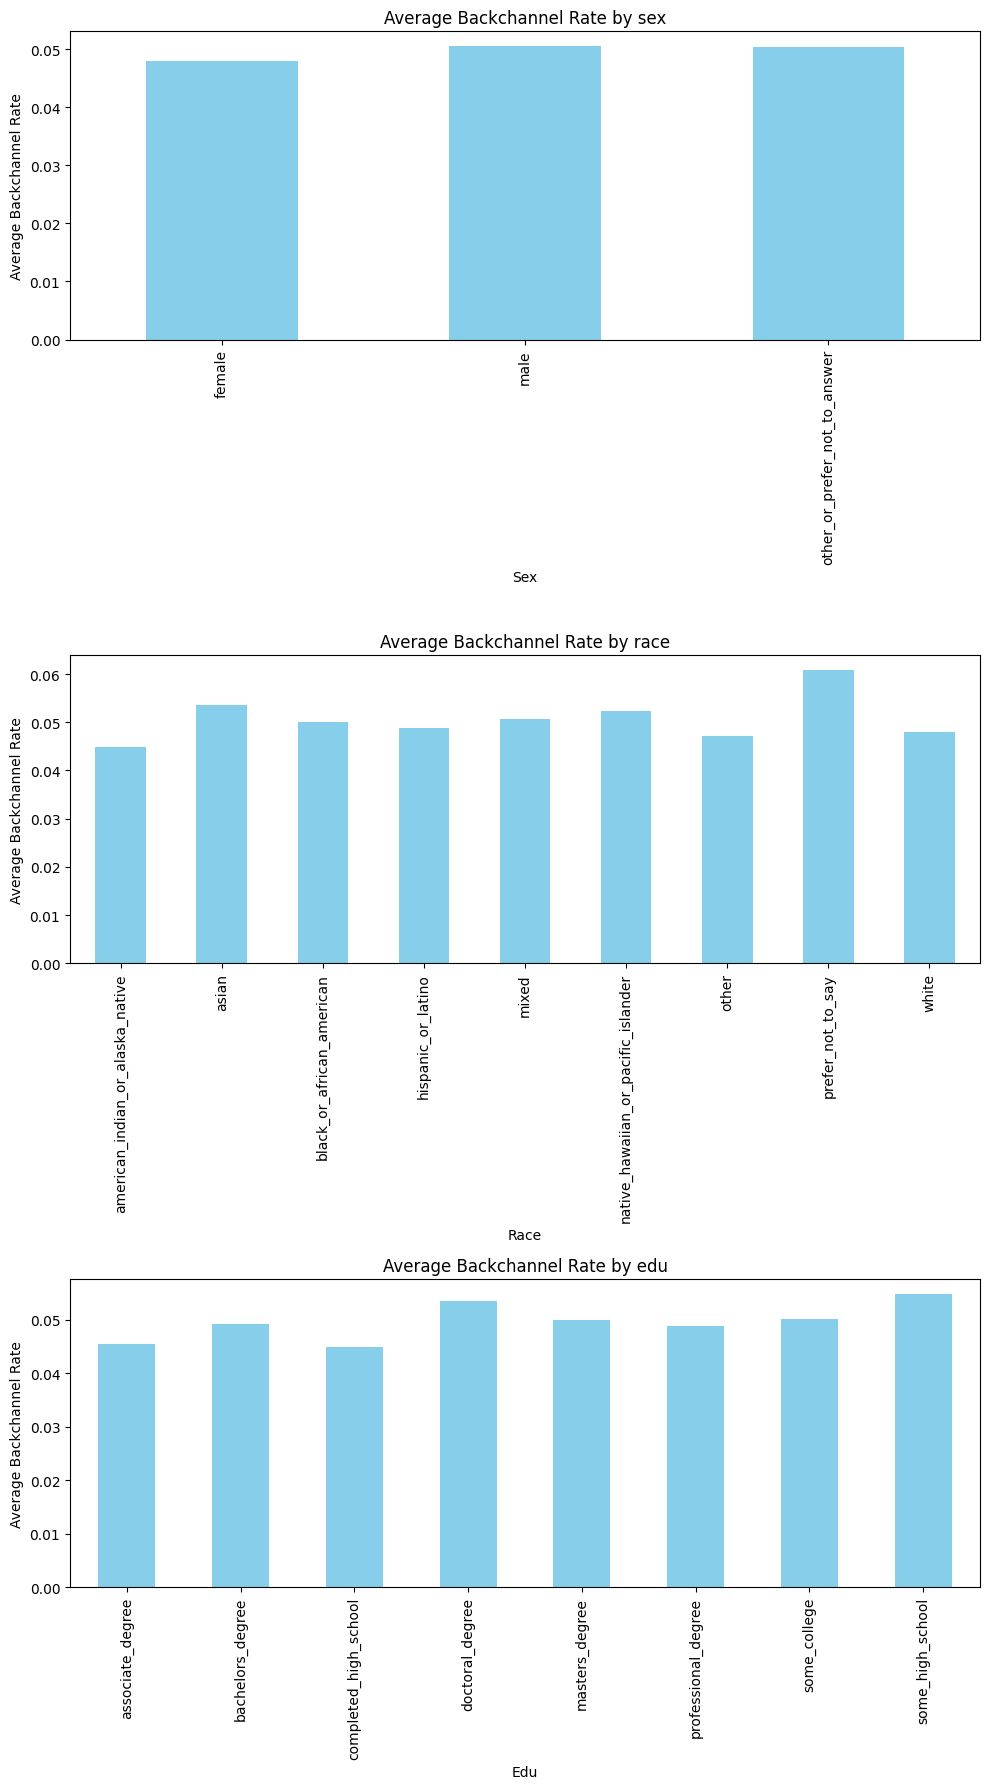

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of categorical features you want to analyze
features_to_analyze = ['sex', 'race', 'edu']

# Assuming backchannel_df and metadata_df are already loaded

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(features_to_analyze), ncols=1, figsize=(10, 6 * len(features_to_analyze)))

# Loop through each feature and calculate the average backchannel rate
for index, feature in enumerate(features_to_analyze):
    # Select the feature and 'user_id' from metadata_df
    metadata_feature_df = metadata_df[[feature, 'user_id']]

    # Merge with backchannel_df
    backchannel_feature_df = pd.merge(backchannel_df, metadata_feature_df, on='user_id', how='inner')

    # Remove rows where the feature is NaN
    backchannel_feature_df = backchannel_feature_df.dropna(subset=[feature])

    # Remove duplicate rows
    backchannel_feature_df = backchannel_feature_df.drop_duplicates(subset=['user_id', 'backchannel_rate', feature])

    # Group by the feature and calculate the average backchannel_rate for each category
    average_backchannel_rate_by_feature = backchannel_feature_df.groupby(feature)['backchannel_rate'].mean()

    # Plot the results for the current feature
    ax = axes[index] if len(features_to_analyze) > 1 else axes
    average_backchannel_rate_by_feature.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f"Average Backchannel Rate by {feature}")
    ax.set_ylabel('Average Backchannel Rate')
    ax.set_xlabel(feature.capitalize())

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


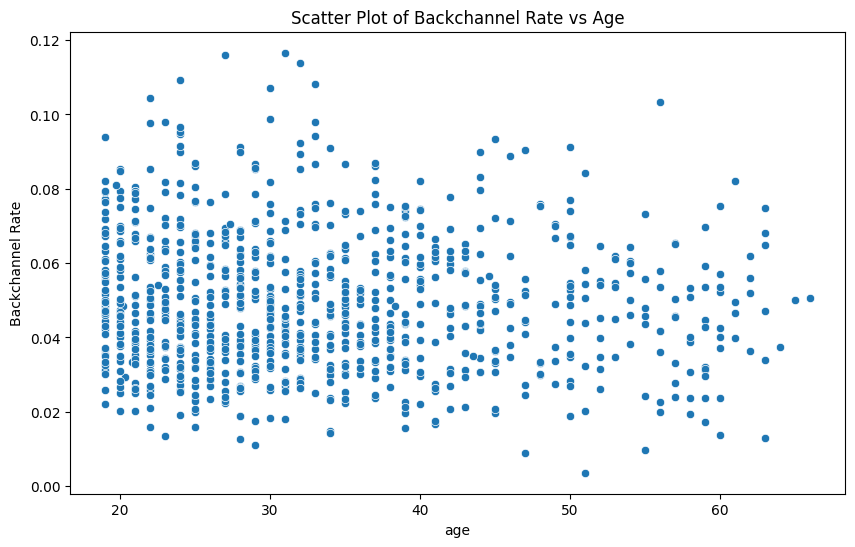

Pearson correlation coefficient: -0.06115085093411


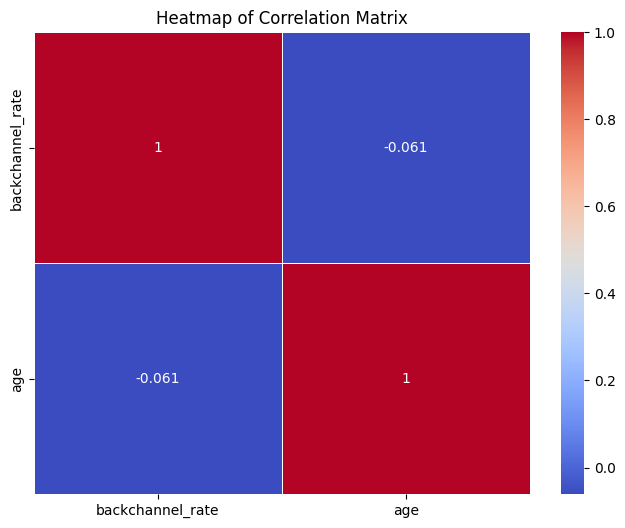

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col_to_select, y='backchannel_rate', data=grouped_df)
plt.title('Scatter Plot of Backchannel Rate vs Age')
plt.ylabel('Backchannel Rate')
plt.xlabel(col_to_select)
plt.show()

# Calculate and print Pearson correlation coefficient
correlation = grouped_df['backchannel_rate'].corr(grouped_df[col_to_select])
print("Pearson correlation coefficient:", correlation)

# Calculate the correlation matrix
corr_matrix = grouped_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()